In [31]:
## "Student Habits vs Academic Performance" dataset from Kaggle 
## dataset simulates 1,000 students' daily habits and compares them to final exam scores

# This CSV file contains a simulated yet realistic dataset titled “Student Habits vs Academic Performance: A Simulated Study”,
# featuring 1,000 student records. Each row represents an individual student, capturing daily lifestyle habits such as study time,
# sleep, social media use, diet quality, mental health rating, and more—mapped against their final exam score. 

# Import necessary libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('data/data.csv') #filepath to dataset 

# Display the first few instances of the dataset for inspection and exploration
print(df.head())

# Explore structure and data types of the dataset
print(df.info())
print(df.describe())

print(df.isnull().sum())

# Only parental_education_level had null values, which can become a problem for model training/stat analysis
# Explore this segment to determine how to handle
# Visualize the distribution of parental education levels

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

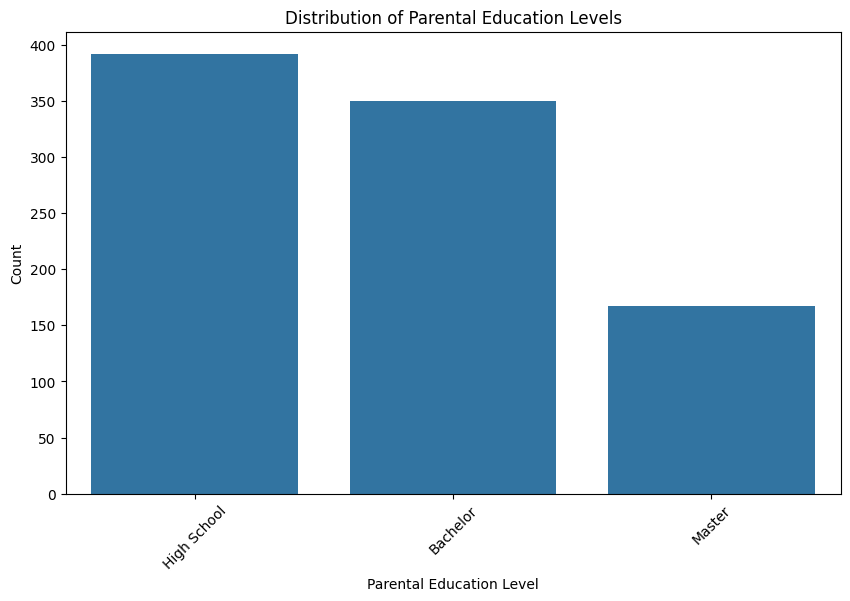

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental_education_level', order=df['parental_education_level'].value_counts().index)
plt.title('Distribution of Parental Education Levels')
plt.xlabel('Parental Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

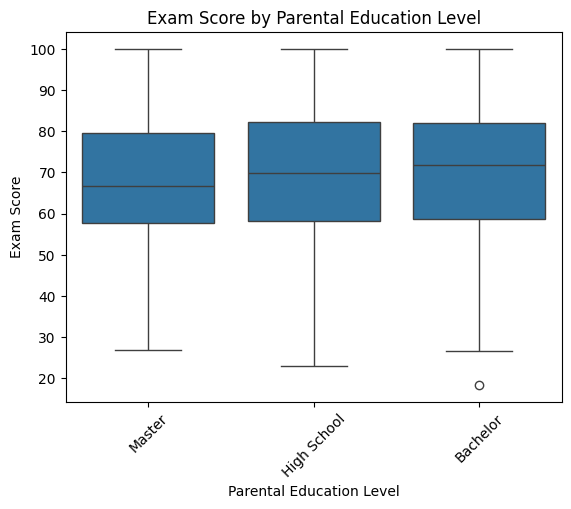

In [34]:
sns.boxplot(data=df, x='parental_education_level', y='exam_score')
plt.xticks(rotation=45)
plt.title('Exam Score by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')
plt.show()

C:\Users\conor\AppData\Local\Temp\ipykernel_20588\2673892515.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna('High School', inplace=True)


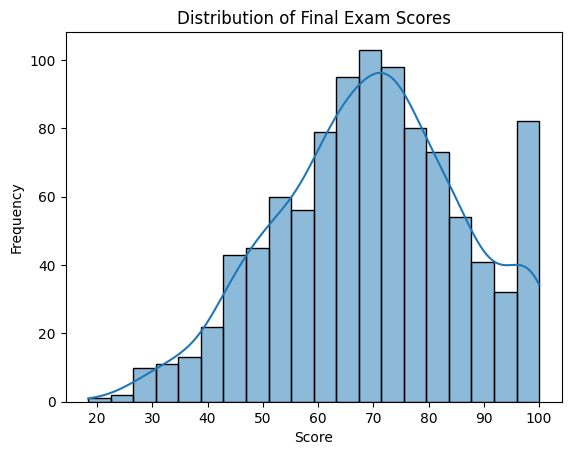

In [35]:
# The boxplot shows no strong correlation between parental education and exam score
# The most frequent category is High School 
# Only about 9% of values are missing (91/1000)
# It is also the closest level of education to those with none 
df['parental_education_level'].fillna('High School', inplace=True)

# Now that the missing values are handled, we can proceed with further analysis
# Visualize the distribution of exam scores
sns.histplot(df['exam_score'], bins=20, kde=True)
plt.title('Distribution of Final Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

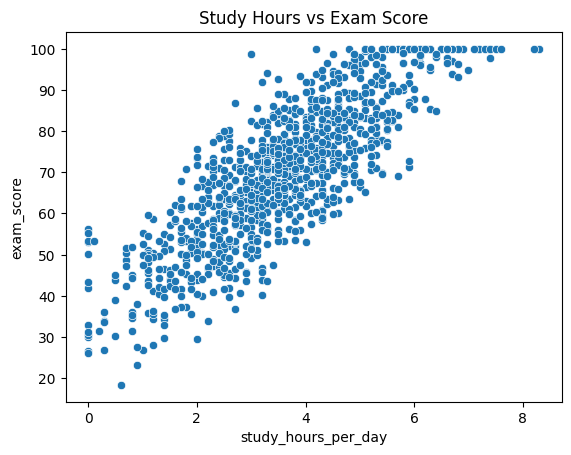

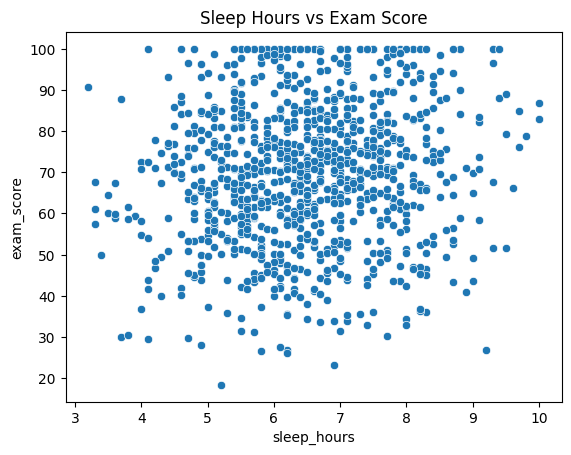

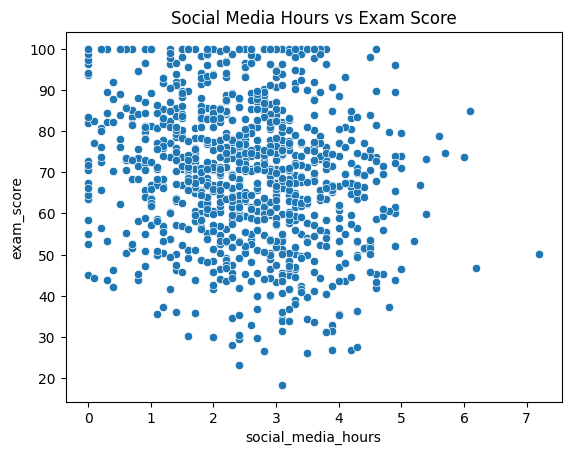

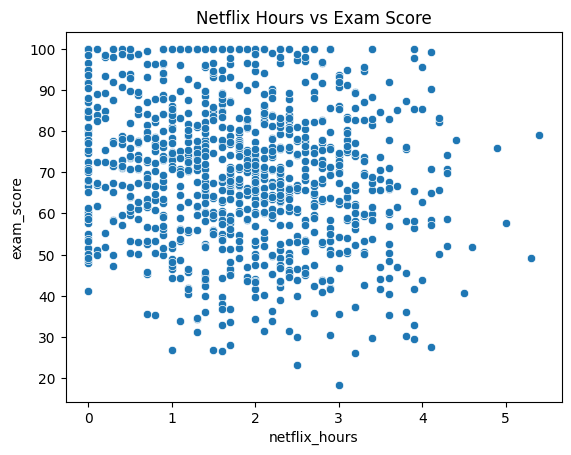

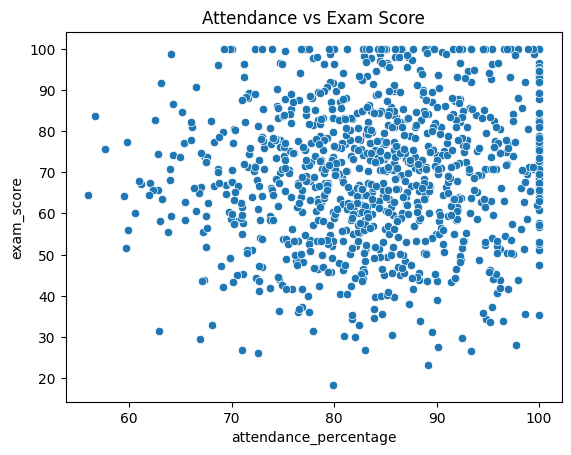

In [36]:
# Let's look at some key relationships in the dataset
# Study time
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Study Hours vs Exam Score')
plt.show()

# Sleep time
sns.scatterplot(data=df, x='sleep_hours', y='exam_score')
plt.title('Sleep Hours vs Exam Score')
plt.show()

# Social media hours
sns.scatterplot(data=df, x='social_media_hours', y='exam_score')
plt.title('Social Media Hours vs Exam Score')
plt.show()

# Netflix hours
sns.scatterplot(data=df, x='netflix_hours', y='exam_score')
plt.title('Netflix Hours vs Exam Score')
plt.show()

# Attendance
sns.scatterplot(data=df, x='attendance_percentage', y='exam_score')
plt.title('Attendance vs Exam Score')
plt.show()

In [37]:
# Correlation matrix to see relationships between numerical features
print(df.corr(numeric_only=True)['exam_score'].sort_values(ascending=False))
# Here we observe that study hours, attendance percentage, and sleep hours have the strongest positive correlations with exam scores.
# Also notable is the negative correlation with social media and Netflix hours, indicating that more time spent on these activities may be associated with lower exam scores.

exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64


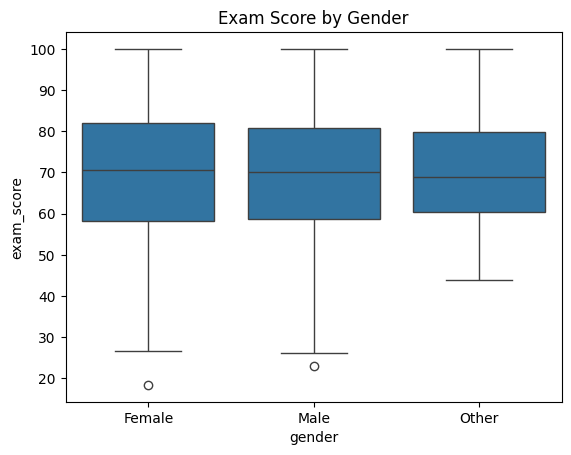

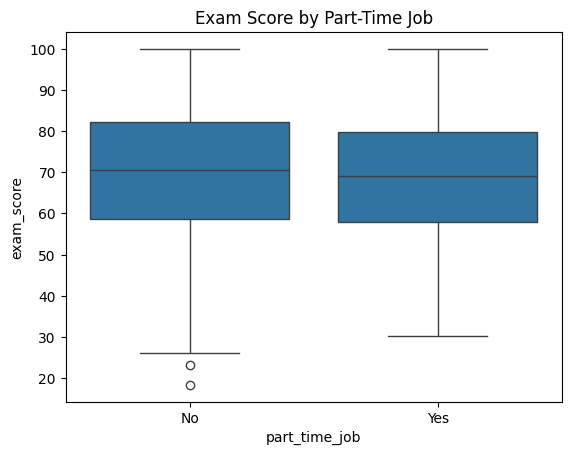

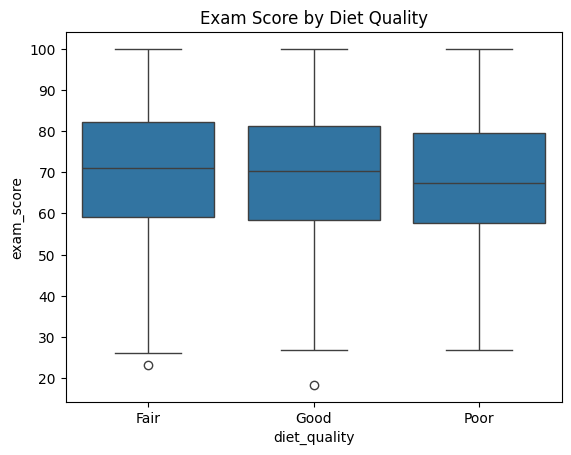

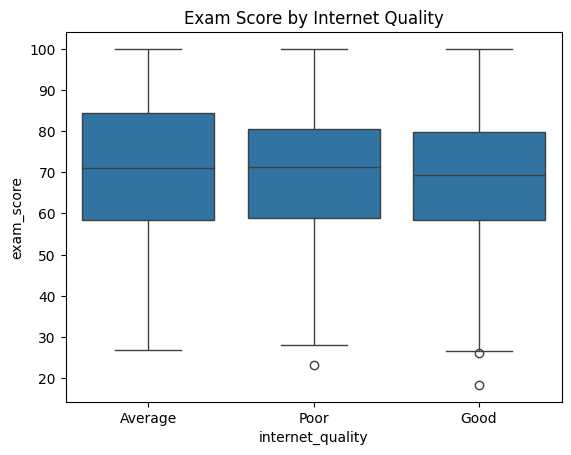

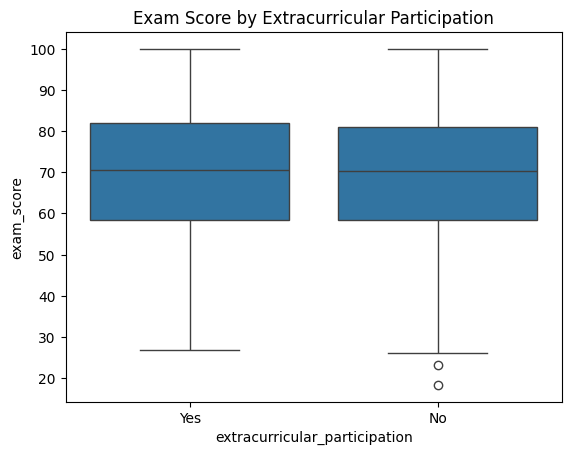

In [38]:
# Gender
sns.boxplot(data=df, x='gender', y='exam_score')
plt.title('Exam Score by Gender')
plt.show()

# Part-time job
sns.boxplot(data=df, x='part_time_job', y='exam_score')
plt.title('Exam Score by Part-Time Job')
plt.show()

# Diet quality
sns.boxplot(data=df, x='diet_quality', y='exam_score')
plt.title('Exam Score by Diet Quality')
plt.show()

# Internet quality
sns.boxplot(data=df, x='internet_quality', y='exam_score')
plt.title('Exam Score by Internet Quality')
plt.show()

# Extracurricular
sns.boxplot(data=df, x='extracurricular_participation', y='exam_score')
plt.title('Exam Score by Extracurricular Participation')
plt.show()

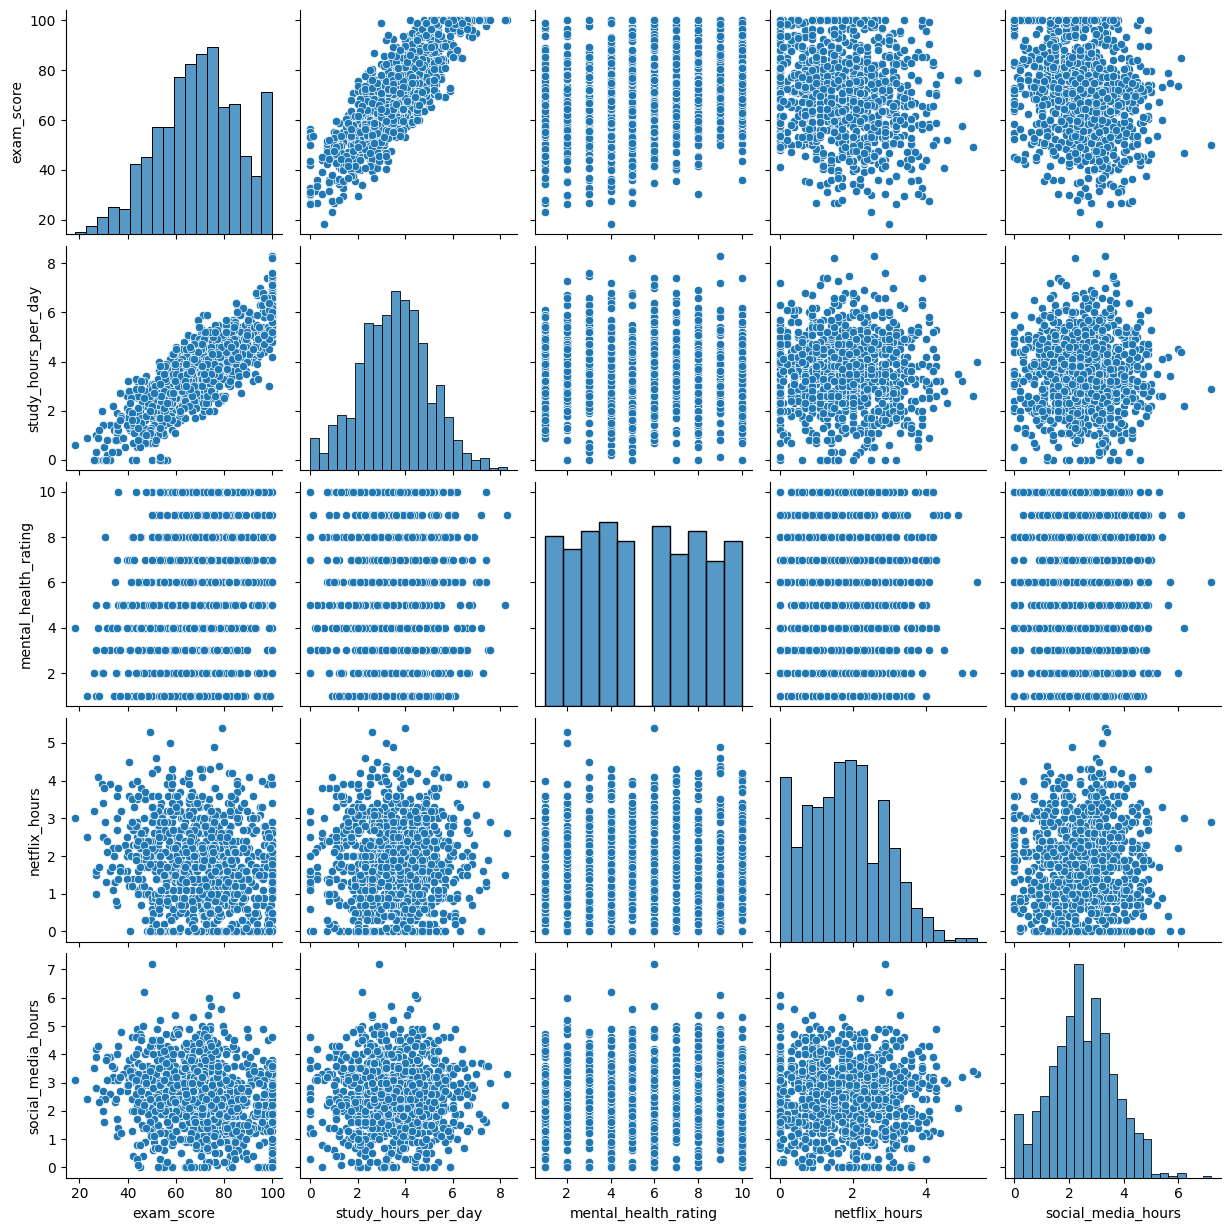

In [39]:
# Pairplot to visualize relationships between the top correlated features with exam score
top_corr = df.corr(numeric_only=True)['exam_score'].abs().sort_values(ascending=False).head(5).index
sns.pairplot(df[top_corr])
plt.show()

In [40]:
# Group by parental education level and calculate exam score statistics
df.groupby('parental_education_level')['exam_score'].describe()

,count,mean,std,min,25%,50%,75%,max
parental_education_level,,,,,,,,
Bachelor,350.0,70.272571,17.286558,18.4,58.675,71.7,81.875,100.0
High School,483.0,69.638923,16.765720,23.1,58.400,70.4,82.200,100.0
Master,167.0,68.086826,16.395325,26.8,57.700,66.8,79.600,100.0


In [41]:
df.groupby('diet_quality')['exam_score'].describe()

,count,mean,std,min,25%,50%,75%,max
diet_quality,,,,,,,,
Fair,437.0,70.428833,16.646113,23.1,59.2,71.0,82.20,100.0
Good,378.0,69.366402,17.069300,18.4,58.4,70.3,81.25,100.0
Poor,185.0,68.127568,17.061393,26.8,57.6,67.4,79.60,100.0


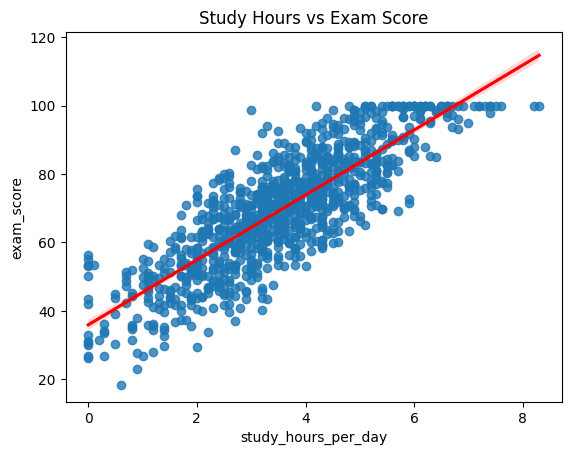

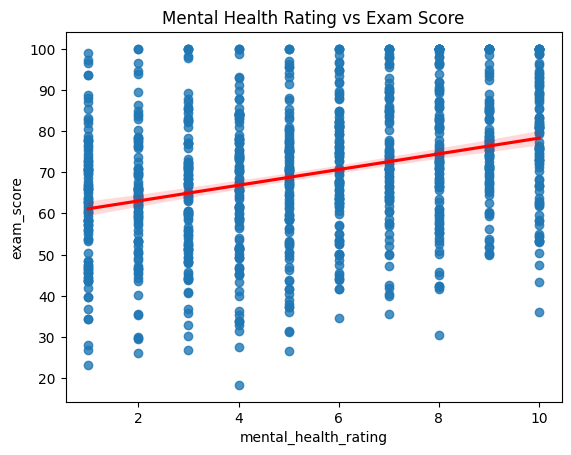

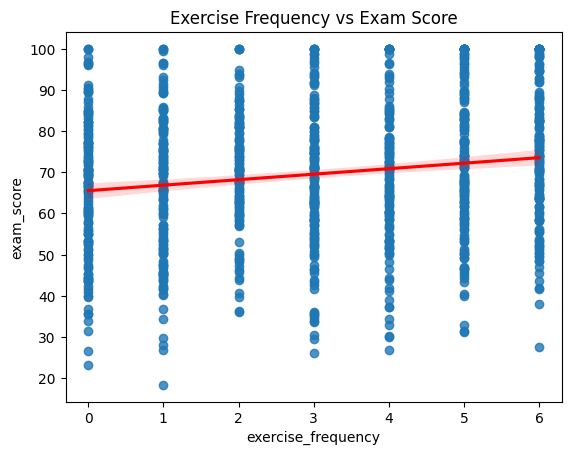

In [42]:
# Focus on top 3 strongest correlators:
# Study hours
sns.regplot(
    data=df, x='study_hours_per_day', y='exam_score',
    line_kws={"color": "red"}
)
plt.title('Study Hours vs Exam Score')
plt.show()

# Mental health
sns.regplot(
    data=df, x='mental_health_rating', y='exam_score',
    line_kws={"color": "red"}
)
plt.title('Mental Health Rating vs Exam Score')
plt.show()
# Exercise frequency
sns.regplot(
    data=df, x='exercise_frequency', y='exam_score',
    line_kws={"color": "red"}
)
plt.title('Exercise Frequency vs Exam Score')
plt.show()

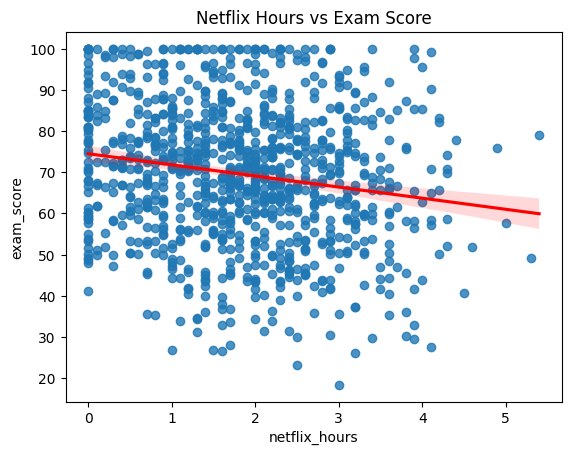

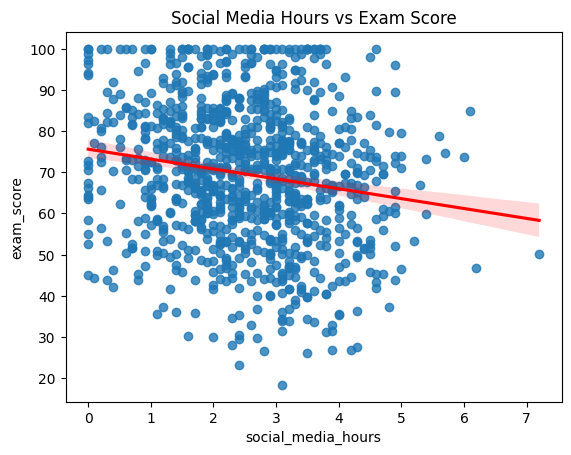

In [43]:
# Below are the relationships with Netflix and social media hours, which showed negative correlations with exam scores.
# Netflix hours
sns.regplot(
    data=df, x='netflix_hours', y='exam_score',
    line_kws={"color": "red"}
)
plt.title('Netflix Hours vs Exam Score')
plt.show()

# Social media hours
sns.regplot(
    data=df, x='social_media_hours', y='exam_score',
    line_kws={"color": "red"}
)
plt.title('Social Media Hours vs Exam Score')
plt.show()

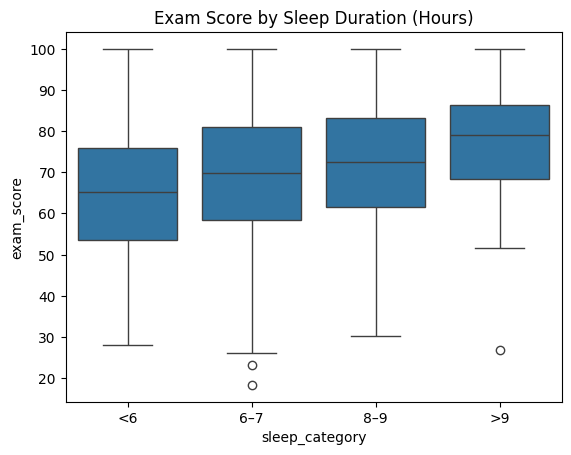

In [44]:
# Sleep duration analysis
# Categorize sleep hours into bins for better visualization (bins: <6, 6–7, 8–9, >9) of non-linear trends
df['sleep_category'] = pd.cut(df['sleep_hours'], bins=[0, 5, 7, 9, 12], labels=['<6', '6–7', '8–9', '>9'])
sns.boxplot(data=df, x='sleep_category', y='exam_score')
plt.title('Exam Score by Sleep Duration (Hours)')
plt.show()

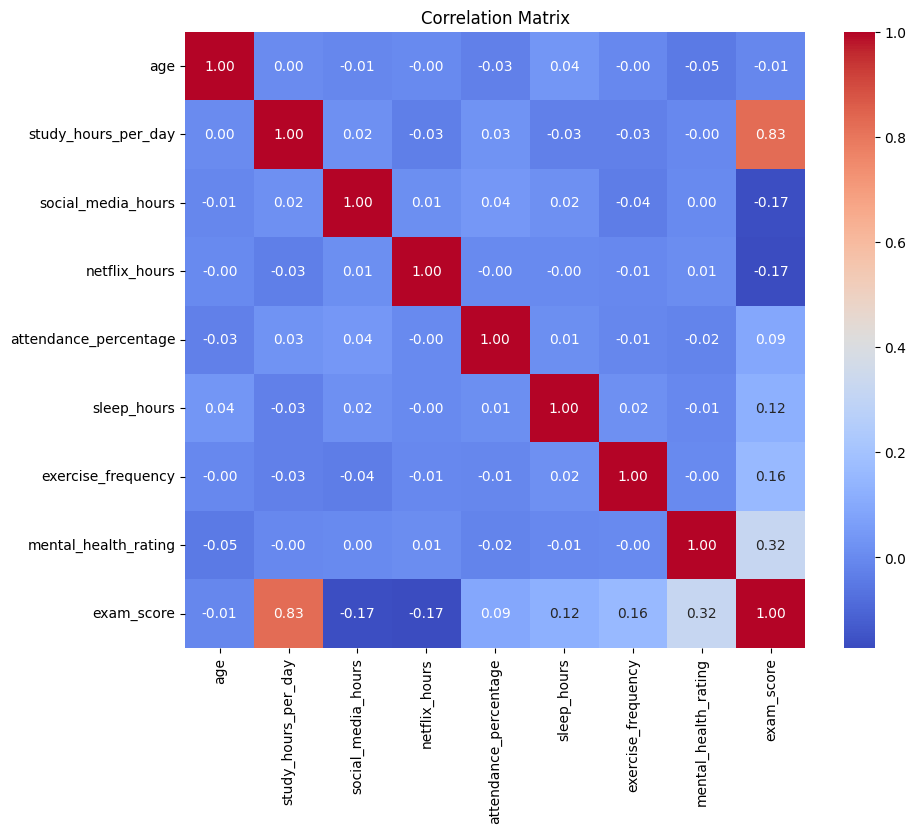

In [45]:
# Correlation heatmap to visualize relationships between all features
# Perhaps find more non-linear relationships
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

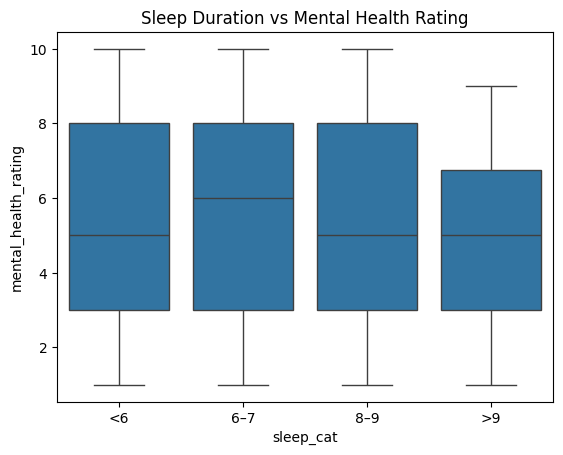

In [46]:
# Sleep and mental health are often linked, with poor sleep leading to worse mental health outcomes.
# Apply bins to apply sleep brackets to mental health rating
df['sleep_cat'] = pd.cut(df['sleep_hours'], bins=[0, 5, 7, 9, 12], labels=['<6','6–7','8–9','>9'])
sns.boxplot(data=df, x='sleep_cat', y='mental_health_rating')
plt.title('Sleep Duration vs Mental Health Rating')
plt.show()

In [47]:
# Perhaps look at others with correlations
df[['mental_health_rating', 'study_hours_per_day']].corr()

df['part_time_binary'] = df['part_time_job'].map({'Yes': 1, 'No': 0})
df[['part_time_binary', 'study_hours_per_day']].corr()

,part_time_binary,study_hours_per_day
part_time_binary,1.000000,-0.029133
study_hours_per_day,-0.029133,1.000000


In [48]:
# ----------------------
# Data preprocessing for modelling

# Define features and target
X = df[[
    'study_hours_per_day', 'mental_health_rating', 'exercise_frequency',
    'social_media_hours', 'diet_quality', 'internet_quality',
    'parental_education_level', 'part_time_job'
]]
y = df['exam_score']

In [49]:
# Identify column types
numeric_features = ['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'social_media_hours']
categorical_features = ['diet_quality', 'internet_quality', 'parental_education_level', 'part_time_job']

# Preprocessor: one-hot encode categorical, passthrough numeric
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [50]:
# -------------
# Modelling
# Split the dataset into training and testing sets
# Train/Test Split & Fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [51]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

#Mean Squared Error: 38.83
#R² Score: 0.85
#This indicates a good fit, as the model explains 85% of the variance in exam scores.

Mean Squared Error: 38.79
R² Score: 0.85


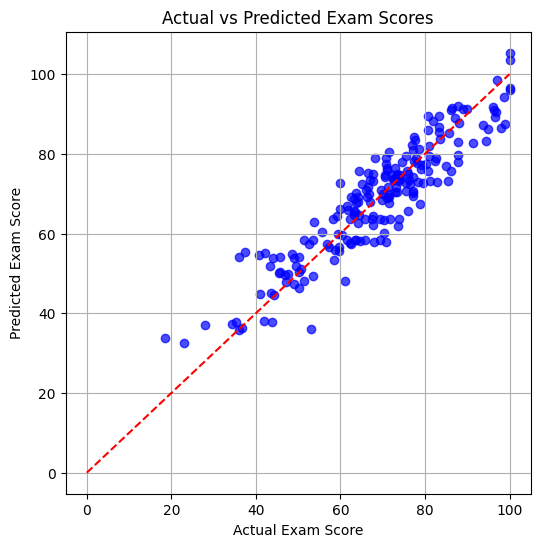

In [52]:
# Plot this model's predictions against actual exam scores
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([0, 100], [0, 100], '--', color='red')  # ideal line
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores')
plt.grid(True)
plt.show()

In [53]:
# Get one-hot encoded feature names
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_features)

# Combine all feature names
all_features = numeric_features + list(encoded_cat_features)

# Get coefficients
coefs = model.named_steps['regressor'].coef_

# Create DataFrame for easy viewing
importance = pd.DataFrame({
    'feature': all_features,
    'coefficient': coefs
}).sort_values(by='coefficient', key=np.abs, ascending=False)

print(importance)

# study had a coefficient of +14.10, indicating each additional hour of study per day is associated with an increase of 14.10 points in the exam score, on average.
# mental health rating had a coefficient of +5.69, indicating that a one-point increase in mental health rating is associated with an increase of 5.69 points in the exam score, on average.
# social media hours had a coefficient of -3.17, indicating that each additional hour spent on social media is associated with a decrease of 3.17 points in the exam score, on average.
# exercise had a coefficient of +2.75, indicating that each additional day of exercise per week is associated with an increase of 2.75 points in the exam score, on average.

                                 feature  coefficient
0                    study_hours_per_day    14.096483
1                   mental_health_rating     5.688490
3                     social_media_hours    -3.171098
2                     exercise_frequency     2.747162
4                      diet_quality_Good    -1.192349
9        parental_education_level_Master    -0.837843
8   parental_education_level_High School    -0.606846
7                  internet_quality_Poor     0.443560
6                  internet_quality_Good    -0.428295
5                      diet_quality_Poor    -0.388467
10                     part_time_job_Yes     0.053044


In [54]:
# Let's look at random forest regression to see if it improves performance
# Re-encode categorical variables with one-hot encoding
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline with Random Forest
model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [55]:
# Train the model again

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model_rf.fit(X_train, y_train)

# Predict
y_pred_rf = model_rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest - MSE: {mse_rf:.5f}")
print(f"Random Forest - R²: {r2_rf:.5f}")

Random Forest - MSE: 44.85298
Random Forest - R²: 0.82509


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20]
}

grid = GridSearchCV(model_rf, param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best RF R²:", grid.best_score_)
print("Best Params:", grid.best_params_)

# Best RF R²: 0.8039479858667292
# Best Params: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
# The best parameters suggest that a maximum depth of 10 and 200 trees yield the best performance for this dataset.

Best RF R²: 0.8039479858667292
Best Params: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}


In [57]:
import shap
# Extract trained Random Forest
fitted_rf = model_rf.named_steps['regressor']

# Transform the data used for training
X_train_transformed = model_rf.named_steps['preprocessor'].transform(X_train)

# Get feature names
ohe = model_rf.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(encoded_cat_features)

# shap explainer
explainer = shap.Explainer(fitted_rf, X_train_transformed, feature_names=all_features)
shap_values = explainer(X_train_transformed)

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 94%|=================== | 754/800 [00:12<00:00]       

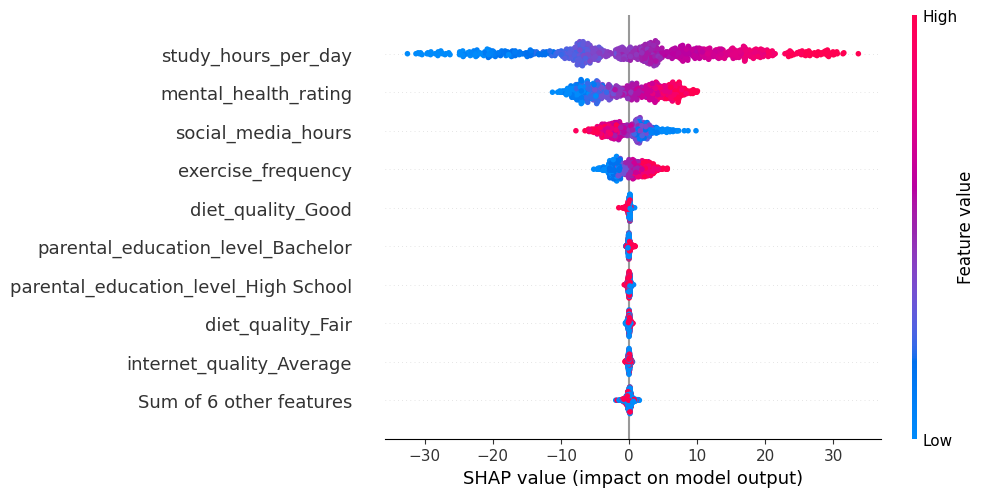

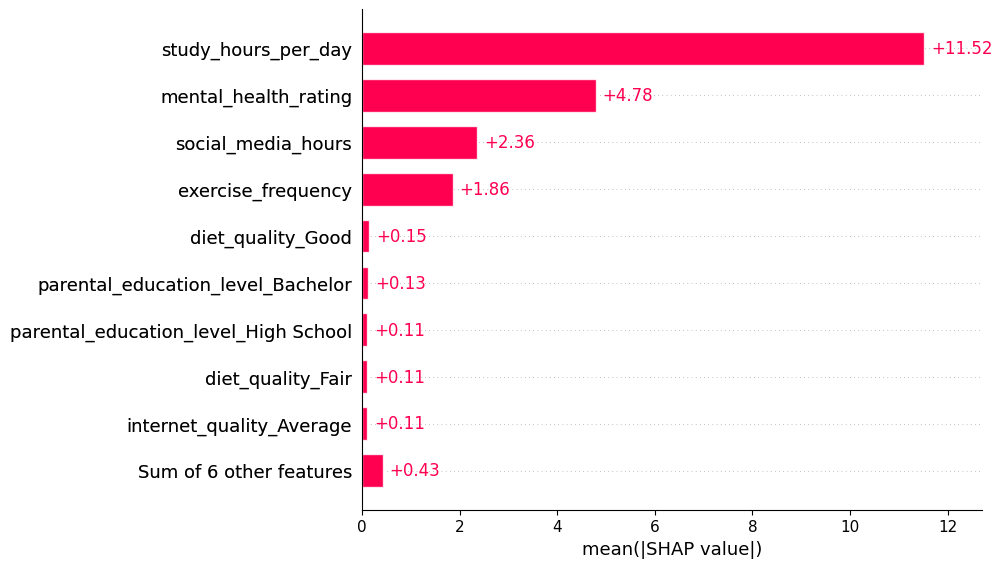

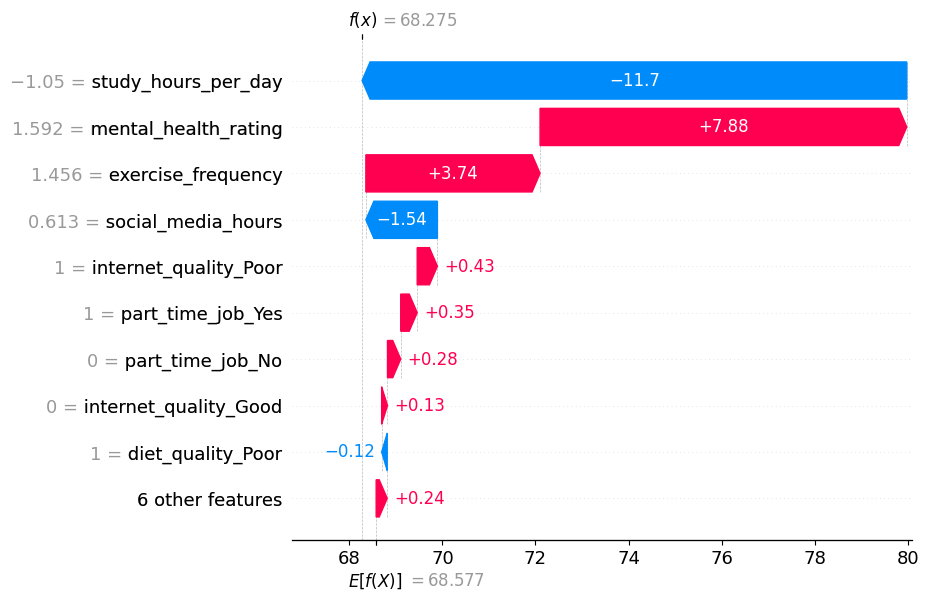

In [58]:
shap.plots.beeswarm(shap_values)
# This plot shows the impact of each feature on the model's output across all instances in the dataset.
# Each point represents a SHAP value for a feature and an instance, with the color indicating the feature value (red for high, blue for low).
# Low values (blue dots on left) → decrease scores
# High values (red dots on right) → increase scores
# study is the most important feature, with high values pushing scores higher.
# mental_health_rating, exercise_frequency also push scores higher when high
# social_media_hours hurts scores when high (red on left)

# bar plot of feature importance
shap.plots.bar(shap_values)
# This plot shows the average absolute SHAP value for each feature, indicating its overall importance in the model.
# Again, study_hours_per_day dominates — adds ~11.5 points on average
# mental_health_rating and social_media_hours are also strong drivers in exam score predictions 
# Categorical features (e.g. parental education, diet quality) have much lower average impact

# inspect as single prediction
shap.plots.waterfall(shap_values[0])
# This plot shows the SHAP values for a single instance (the first one in the dataset).
# It breaks down the prediction into contributions from each feature.
# Low study_hours_per_day: –11.71 (hurts score significantly)
# High mental_health_rating: +7.88


# this shows the impact of each feature on the prediction for a single instance, with positive values pushing the prediction higher and negative values pushing it lower.
# perfect for showing "why this student's score was predicted as X".

 95%|=================== | 759/800 [00:19<00:01]       

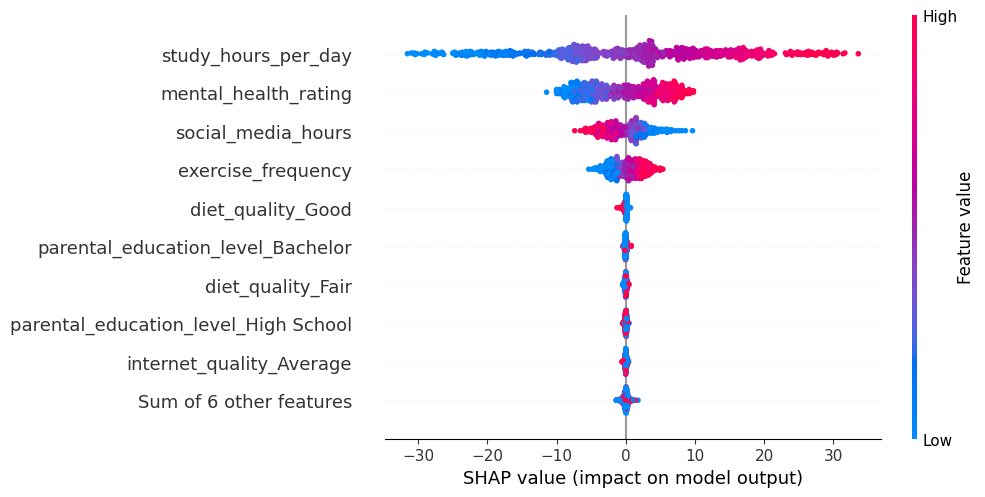

In [59]:
# Explore tuned model for SHAP
best_model = grid.best_estimator_
fitted_rf = best_model.named_steps['regressor']
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

explainer = shap.Explainer(fitted_rf, X_train_transformed, feature_names=all_features)
shap_values = explainer(X_train_transformed)

shap.plots.beeswarm(shap_values)

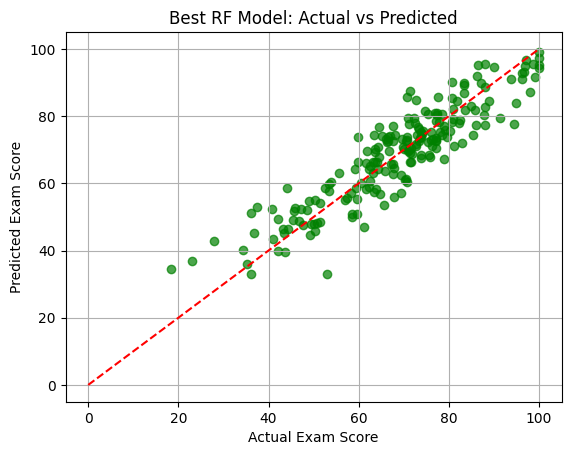

In [60]:
# Explore visually for the best model
y_pred_best = best_model.predict(X_test)

plt.scatter(y_test, y_pred_best, alpha=0.7, color='green')
plt.plot([0, 100], [0, 100], '--', color='red')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Best RF Model: Actual vs Predicted')
plt.grid(True)
plt.show()
# Most points are tightly clustered along the red line, especially in the 50–100 score range → high accuracy
# more variability in lower-performing students
# model generalizes well (no obvious bias or overfitting)

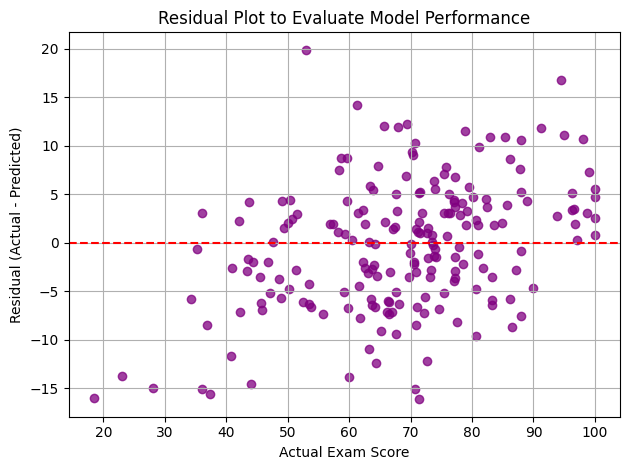

In [66]:
# Residual plot to visualize prediction errors
residuals = y_test - y_pred_best
plt.scatter(y_test, residuals, alpha=0.75, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot to Evaluate Model Performance")
plt.grid(True)
plt.tight_layout()
plt.show()